## Ciência de Dados - Trabalho Prático

> **Nomes:** Bruno Santos Fernandes, João Paulo Moura Clevelares, Thamya Vieira Hashimoto Donadia <br>
> **Matrículas:** 2021100784, 2021100149, 2021100146 <br>
> **E-mails:** {bruno.s.fernandes, joao.clevelares, thamya.donadia}@edu.ufes.br <br>
> **Curso:** Engenharia de Computação <br>


### Metodologia

#### Instalação de bibliotecas

In [1]:
# importação de bibliotecas
import numpy as np
import pandas as pd
import string
import unidecode

import nltk
nltk.download('punkt_tab')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt_tab to /home/joao/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Pré-processamento dos dados textuais

In [2]:
# carregamento do dataset 
df = pd.read_csv("./filmes.csv")
df.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names
0,Family,7.1,387992,When two kids find and play a magical board ga...,Jumanji,1995,104,['Robin Williams' 'Jonathan Hyde' 'Jonathan Hy...,['Joe Johnston']
1,Romance,6.7,30265,John and Max resolve to save their beloved bai...,Grumpier Old Men,1995,101,['Walter Matthau' 'Jack Lemmon' 'Burgess Mered...,['Howard Deutch']
2,Romance,6.0,12585,"Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,1995,124,['Gregory Hines' 'Dennis Haysbert' 'Mykelti Wi...,['Forest Whitaker']
3,"Romance,Family",6.1,42555,George Banks must deal not only with his daugh...,Father of the Bride Part II,1995,106,['Steve Martin' 'Martin Short' 'George Newbern...,['Charles Shyer']
4,"Crime,Action",8.3,738636,A group of high-end professional thieves start...,Heat,1995,170,['Al Pacino' 'Robert De Niro' 'Val Kilmer' 'Jo...,['Michael Mann']


In [3]:
# obtenção das informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30358 entries, 0 to 30357
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           30358 non-null  object 
 1   averageRating    30358 non-null  float64
 2   numVotes         30358 non-null  int64  
 3   sinopse          30358 non-null  object 
 4   primaryTitle     30358 non-null  object 
 5   startYear        30358 non-null  int64  
 6   runtimeMinutes   30358 non-null  object 
 7   actors_names     30358 non-null  object 
 8   directors_names  30358 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.1+ MB


In [4]:
# verificando as features do dataset
df.columns

Index(['genres', 'averageRating', 'numVotes', 'sinopse', 'primaryTitle',
       'startYear', 'runtimeMinutes', 'actors_names', 'directors_names'],
      dtype='object')

In [5]:
# obtendo a feature a ser processada (sinopse)
df['sinopse'].head(10)

0    When two kids find and play a magical board ga...
1    John and Max resolve to save their beloved bai...
2    Based on Terry McMillan's novel, this film fol...
3    George Banks must deal not only with his daugh...
4    A group of high-end professional thieves start...
5    An ugly duckling having undergone a remarkable...
6    A former fireman takes on a group of terrorist...
7    When a powerful secret defense system is stole...
8    A widowed U.S. President running for reelectio...
9    Mel Brooks' parody of the classic vampire stor...
Name: sinopse, dtype: object

In [6]:
# divisão do texto em sentenças e palavras
df['sentences'] = df['sinopse'].apply(sent_tokenize)
df['tokens'] = df['sinopse'].apply(word_tokenize)

df.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names,sentences,tokens
0,Family,7.1,387992,When two kids find and play a magical board ga...,Jumanji,1995,104,['Robin Williams' 'Jonathan Hyde' 'Jonathan Hy...,['Joe Johnston'],[When two kids find and play a magical board g...,"[When, two, kids, find, and, play, a, magical,..."
1,Romance,6.7,30265,John and Max resolve to save their beloved bai...,Grumpier Old Men,1995,101,['Walter Matthau' 'Jack Lemmon' 'Burgess Mered...,['Howard Deutch'],[John and Max resolve to save their beloved ba...,"[John, and, Max, resolve, to, save, their, bel..."
2,Romance,6.0,12585,"Based on Terry McMillan's novel, this film fol...",Waiting to Exhale,1995,124,['Gregory Hines' 'Dennis Haysbert' 'Mykelti Wi...,['Forest Whitaker'],"[Based on Terry McMillan's novel, this film fo...","[Based, on, Terry, McMillan, 's, novel, ,, thi..."
3,"Romance,Family",6.1,42555,George Banks must deal not only with his daugh...,Father of the Bride Part II,1995,106,['Steve Martin' 'Martin Short' 'George Newbern...,['Charles Shyer'],[George Banks must deal not only with his daug...,"[George, Banks, must, deal, not, only, with, h..."
4,"Crime,Action",8.3,738636,A group of high-end professional thieves start...,Heat,1995,170,['Al Pacino' 'Robert De Niro' 'Val Kilmer' 'Jo...,['Michael Mann'],[A group of high-end professional thieves star...,"[A, group, of, high-end, professional, thieves..."


In [7]:
# conversão do texto para letras minúsculas
df['tokens'] = df['tokens'].apply(lambda x: [token.lower() for token in x])
df['tokens'].head(10)

0    [when, two, kids, find, and, play, a, magical,...
1    [john, and, max, resolve, to, save, their, bel...
2    [based, on, terry, mcmillan, 's, novel, ,, thi...
3    [george, banks, must, deal, not, only, with, h...
4    [a, group, of, high-end, professional, thieves...
5    [an, ugly, duckling, having, undergone, a, rem...
6    [a, former, fireman, takes, on, a, group, of, ...
7    [when, a, powerful, secret, defense, system, i...
8    [a, widowed, u.s., president, running, for, re...
9    [mel, brooks, ', parody, of, the, classic, vam...
Name: tokens, dtype: object

In [8]:
# remoção de símbolos de pontuação de cada token
table = str.maketrans('', '', string.punctuation)
df['tokens'] = df['tokens'].apply(lambda x: [token.translate(table) for token in x])
df['tokens'].head(10)

0    [when, two, kids, find, and, play, a, magical,...
1    [john, and, max, resolve, to, save, their, bel...
2    [based, on, terry, mcmillan, s, novel, , this,...
3    [george, banks, must, deal, not, only, with, h...
4    [a, group, of, highend, professional, thieves,...
5    [an, ugly, duckling, having, undergone, a, rem...
6    [a, former, fireman, takes, on, a, group, of, ...
7    [when, a, powerful, secret, defense, system, i...
8    [a, widowed, us, president, running, for, reel...
9    [mel, brooks, , parody, of, the, classic, vamp...
Name: tokens, dtype: object

In [9]:
# conversão de caracteres especiais
df['tokens'] = df['tokens'].apply(lambda x: [unidecode.unidecode(token) for token in x])
df['tokens'].head(10)


0    [when, two, kids, find, and, play, a, magical,...
1    [john, and, max, resolve, to, save, their, bel...
2    [based, on, terry, mcmillan, s, novel, , this,...
3    [george, banks, must, deal, not, only, with, h...
4    [a, group, of, highend, professional, thieves,...
5    [an, ugly, duckling, having, undergone, a, rem...
6    [a, former, fireman, takes, on, a, group, of, ...
7    [when, a, powerful, secret, defense, system, i...
8    [a, widowed, us, president, running, for, reel...
9    [mel, brooks, , parody, of, the, classic, vamp...
Name: tokens, dtype: object

In [10]:
# remoção de tokens que não são palavras
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token.isalpha()])
df['tokens'].head(10)

# TODO: Talvez seja necessário usar alguns tokens númericos

0    [when, two, kids, find, and, play, a, magical,...
1    [john, and, max, resolve, to, save, their, bel...
2    [based, on, terry, mcmillan, s, novel, this, f...
3    [george, banks, must, deal, not, only, with, h...
4    [a, group, of, highend, professional, thieves,...
5    [an, ugly, duckling, having, undergone, a, rem...
6    [a, former, fireman, takes, on, a, group, of, ...
7    [when, a, powerful, secret, defense, system, i...
8    [a, widowed, us, president, running, for, reel...
9    [mel, brooks, parody, of, the, classic, vampir...
Name: tokens, dtype: object

In [11]:
# remoção de stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stop_words])
df['tokens'].head(10)


0    [two, kids, find, play, magical, board, game, ...
1    [john, max, resolve, save, beloved, bait, shop...
2    [based, terry, mcmillan, novel, film, follows,...
3    [george, banks, must, deal, daughter, pregnanc...
4    [group, highend, professional, thieves, start,...
5    [ugly, duckling, undergone, remarkable, change...
6    [former, fireman, takes, group, terrorists, ho...
7    [powerful, secret, defense, system, stolen, ja...
8    [widowed, us, president, running, reelection, ...
9    [mel, brooks, parody, classic, vampire, story,...
Name: tokens, dtype: object

In [12]:
# stemming 
df['tokens'] = df['tokens'].apply(lambda x: [PorterStemmer().stem(token) for token in x])
df['tokens'].head(10)

0    [two, kid, find, play, magic, board, game, rel...
1    [john, max, resolv, save, belov, bait, shop, t...
2    [base, terri, mcmillan, novel, film, follow, f...
3    [georg, bank, must, deal, daughter, pregnanc, ...
4    [group, highend, profession, thiev, start, fee...
5    [ugli, duckl, undergon, remark, chang, still, ...
6    [former, fireman, take, group, terrorist, hold...
7    [power, secret, defens, system, stolen, jame, ...
8    [widow, us, presid, run, reelect, environment,...
9    [mel, brook, parodi, classic, vampir, stori, f...
Name: tokens, dtype: object

### Amostragem

In [13]:
sample = df[["sinopse", "tokens"]].sample(frac=0.3, random_state=42)
sample

,sinopse,tokens
21377,"Mike Braxton (Sam Jones) a St. Louis cop, rece...","[mike, braxton, sam, jone, st, loui, cop, rece..."
16221,Fervidly dark lovesick horror inspired by the ...,"[fervidli, dark, lovesick, horror, inspir, rea..."
8341,A couple struggles to visit all four of their ...,"[coupl, struggl, visit, four, divorc, parent, ..."
14092,"Chaos ensues when a lethal, airborne virus inf...","[chao, ensu, lethal, airborn, viru, infect, po..."
12135,Josh's girlfriend wants to get married. Molly'...,"[josh, girlfriend, want, get, marri, molli, bo..."
...,...,...
4591,Two bored children have their lives turned ups...,"[two, bore, children, live, turn, upsid, talk,..."
10493,An obsessed cop tracks an elusive serial kille...,"[obsess, cop, track, elus, serial, killer, str..."
5625,After botanist Wilfred Glendon travels to Tibe...,"[botanist, wilfr, glendon, travel, tibet, sear..."
8542,"Brian O'Conner, back working for the FBI in Lo...","[brian, oconn, back, work, fbi, lo, angel, tea..."


#### Construção da matriz de TF-IDF

In [14]:
# gerando a matriz de contagem de termos 
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(sample["sinopse"])
vocab = vectorizer.get_feature_names_out()
vocab

array(['000', '007', '09', ..., 'époque', 'état', 'único'],
      shape=(23080,), dtype=object)

In [15]:
# calculando a frequência de documentos em que cada termo aparece
doc_freq = np.array((X_counts > 0).sum(axis=0)).flatten()
df_vocab = pd.DataFrame({'termo': vocab, 'doc_freq': doc_freq})
df_vocab[df_vocab['doc_freq'] == 1].head(10)

,termo,doc_freq
1,007,1
2,09,1
5,1000s,1
6,100th,1
7,101st,1
8,108,1
9,109,1
12,1138,1
13,117,1
14,1183,1


In [16]:
# análise estatística descritiva
mean = np.mean(doc_freq)
median = np.median(doc_freq)
percentiles = np.percentile(doc_freq, [25, 50, 75])

print("Estatísticas da frequência dos termos:")
print(f"Média: {mean:.2f}")
print(f"Mediana: {median}")
print(f"Percentis 25, 50 e 75: {percentiles}")

Estatísticas da frequência dos termos:
Média: 10.84
Mediana: 2.0
Percentis 25, 50 e 75: [1. 2. 4.]


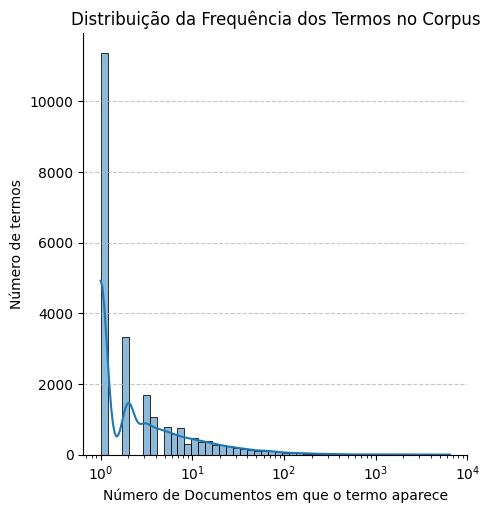

In [17]:
# plotando o histrogama da frequência dos termos
sns.displot(df_vocab, x=df_vocab['doc_freq'], kde=True, bins=50, log_scale=(True, False))
plt.ylabel('Número de termos')
plt.xlabel('Número de Documentos em que o termo aparece')
plt.title('Distribuição da Frequência dos Termos no Corpus')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

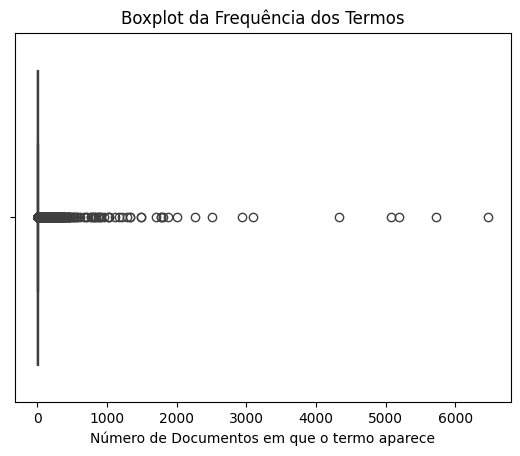

In [18]:
sns.boxplot(x=df_vocab['doc_freq'])
plt.xlabel('Número de Documentos em que o termo aparece')
plt.title('Boxplot da Frequência dos Termos')
plt.show()

In [19]:
vectorizer = TfidfVectorizer(min_df = 2)
X = vectorizer.fit_transform(sample["tokens"].apply(lambda tokens: " ".join(tokens)))
X.shape

(9107, 8542)

In [20]:
tfidf_matrix = pd.DataFrame(X.todense(), columns = vectorizer.get_feature_names_out())
tfidf_matrix

,aaron,aback,abandon,abbess,abbi,abbott,abduct,abductor,abe,abid,...,ziegfeld,zodiac,zoe,zombi,zombielik,zone,zoo,zoom,zurich,zweig
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Redução de dimensionalidade, via Truncated SVD

In [ ]:
n_components_full = X.shape[1]
svd_full = TruncatedSVD(n_components=n_components_full)
svd_full.fit(X)

In [77]:
# plotando a variância cumulativa
cumulative_variance = np.cumsum(svd_full.explained_variance_ratio_)

plt.figure(figsize=(7, 5))
plt.plot(np.arange(1, n_components_full + 1), cumulative_variance)
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada')
plt.title('Variância Explicada Cumulativa com TruncatedSVD')
plt.grid(True)
plt.show()

In [78]:
# new_n_components = 6000
# svd = TruncatedSVD(n_components=new_n_components)
# X2 = svd.fit_transform(X)